In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## MS263  April 25, 2017 - Week11

### Filtering and Convolution

__Convolution__: smoothing and filtering data

__Running Average (Box Car filter)__:
Taking the average over a certain block (30 hrs, 5 days ... etc). <br>
    Maybe normalized so the sum of the weights is equal to 1
<img src='images/running_avg.png' width="400">
__Convolution__
<img src='images/convolution.png' width="400">
<img src='images/convolution2.png' width="600">

For Two time series f(t) and g(t)
    - f has M samples, $f_k$ where k = 1,2,3...M
    - g has N samples, $g_i$ where i = 1,2,3...N
__ Convolution__:
$ (f * g)_j = \sum_{k=1}^M g_{j-k} f_k $
    
Has N+M-1 points

Filtering applications:<br>
f is a time series (observations)<br>
g is a set of weights (filter)

__ Examples: Hanning window with the ENSO __

Individual EL Nino /La Nina cycles smoothed to highlight time periods  > 5 years (60 months)

__ Hanning window __: Raised Cosine functions, so that all the values are positive (and sums to 1) <br>
__ Running average__ would leave some high frequency

<img src='images/hanning.png' width="600">

__ Can Obtain high frequency variability by subtracting filtered time series form original time series __

<img src='images/filtering.png' width="600">


__ What makes an Ideal filter?  __

For white noise (equal energy at all frequencies) <br>
All energy in low frequencies (__pass band__) retrained<br>
all energy in high frequencies (__stop band__) removed<br>

<img src='images/filtering2.png' width="300">

__Ideal filter__ <br>
Assuming an infinite time series, the filter would look like a sinc function:<br>
- sinc function is the fft of a step function
- Has an infinite number of weights (__This is NOT practical__)
<img src='images/filtering3.png' width="300">

__Practical filter__ <br>
Ideal filter tapered off a the edges with a window <br>
Trade-off: longer winder better, but more information lost at the edges
<img src='images/filtering4.png' width="300">

__ Spectral characteristics of filters __ <br>
Spectrum of white nose after applying two types of filters (Boxcar and Hamming): <br>
- Ripples in frequency response of rectangular window (spectral leakage)<br>
- Hamming window has less ripples but a broader transition range (trade-off)<br>

<img src='images/filtering6.png' width="800">

__dB - decibels __: logogrithmic unit used to describe attenuation (reduction of energy)

$$ dB = 10 log_{10}(\frac{A^2}{A_0^2}) $$ Where $ A_0 $ is a reference amplitude


<img src='images/filtering7.png' width="800">


## Common Oceanographic Filters ##
__Cosine-Lanczos Filter__
- "Lancz7" filter: designed to filter out energy at diurnal and tidal fequencies
- Half amplitude period = 34.29 hours
- Half amplitude frequency = 0.7 cpd
<img src='images/cos_lanc.png' width="300">

__PL64 Weights __
<img src='images/PL64.png' width="300">


__Take Home Points__ <br>

- Boxcar filters (running averages) are simple but not very effective

- A normalized Hanning window (El Nino example) improves on the boxcar by soothing out the abrupt edges

- More sophisticated filters (e.g. cosine-Lanczos) get closer to an ideal spectral response but require a large number of weights; not practical for shorter time series

__How to represent an image (or color) as a number__
- __Binary__: Each pixel has a value of 0 or 1 (black or white)
- __grayscale__: Each pixel has a value between 0 and 255 (black is 0 white is 255) Each pixel has 8-bits of data ($2^8$)
- __RGB__: storing a value for each pixel as three component colors - Red, Green, Blue
Each pixel has three 8 bit values. All colors combined corresponds to white
- __CMYK__: Uses Cyan - Magenta - Yellow and combining colors makes Black (this is used more for printing)
<img src='images/colors.png' width="600">
__But__ CMYK is a subset of RGB, so you cant always print what is on the screen
<img src='images/colors2.png' width="500">


Transforming from CMY to RGB:<br>
C = 255 - R<br>
M = 255 - G<br>
Y = 255 - B<br>


Hue, Saturation, Intensity (or lightness)
<img src='images/hue_sat_ints.png' width="300">


In [2]:
file = 'images/squid.jpg'
pic = Image.open(file,'r')

In [3]:
print('W:',pic.width)
print('H:',pic.height)

W: 4033
H: 2342


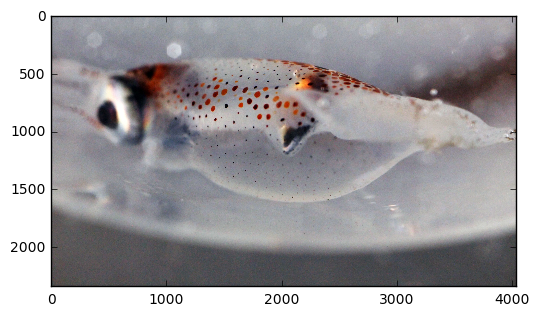

In [4]:
plt.figure()
plt.imshow(pic)

In [5]:
print(pic.format)
print(pic.size)
print(pic.mode)

JPEG
(4033, 2342)
RGB


In [6]:
parr = np.asarray(pic)
np.shape(parr)
transform = np.array(([1,1,0],[0,0,1],[0,0,0])) # This transformation converts 

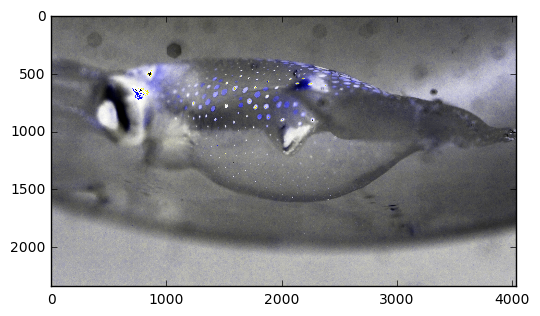

In [7]:
ptrans = np.dot(parr,transform)
plt.figure()
plt.imshow(ptrans)

In [8]:
parr = np.asarray(pic)
np.shape(parr)
transform = np.array(([1,0,0],[0,1,1],[0,0,0])) # This transformation converts 

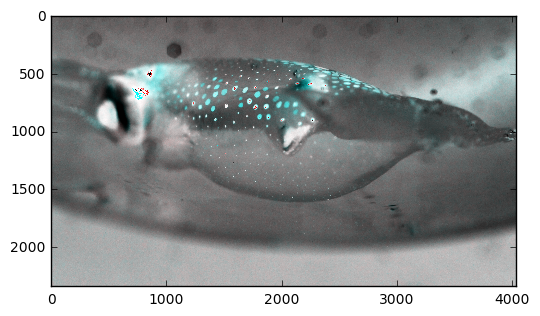

In [9]:
ptrans = np.dot(parr,transform)
plt.figure()
plt.imshow(ptrans)

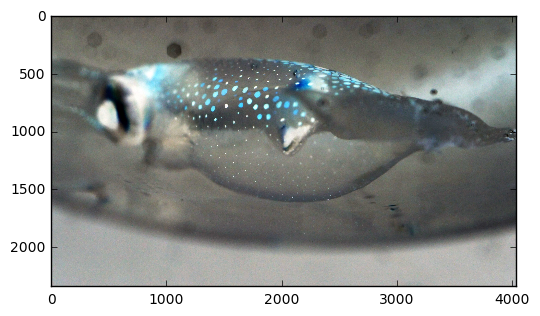

In [10]:
# Transform to the negative
neg = 255 - parr 
plt.figure()
plt.imshow(neg)


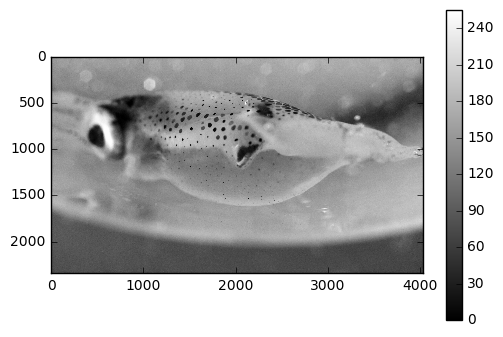

In [11]:
# Transform to Grayscale
pgray = pic.convert('L')
pgarr = np.asarray(pgray)
plt.figure()
ax = plt.imshow(pgray, cmap='gray')
plt.colorbar()


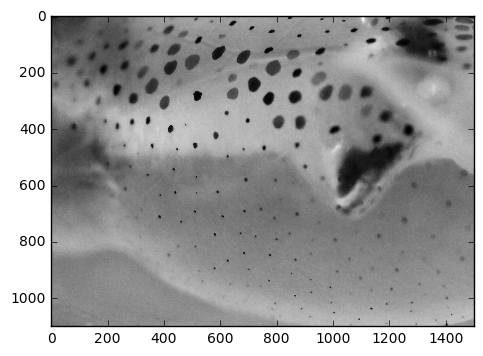

In [61]:
# Cropping the image
pcrop = pgray.crop(box=(1000,500,2500,1600))
plt.figure()
plt.imshow(pcrop,cmap='gray')

(2342, 4033)


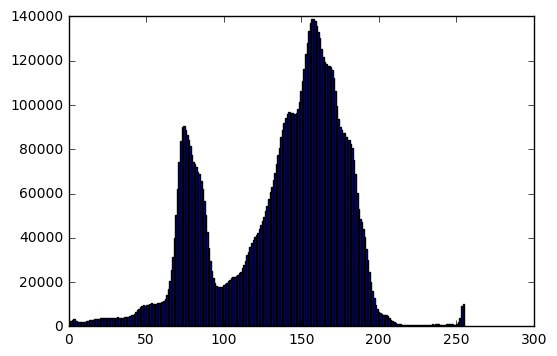

In [13]:

print(np.shape(pgarr))
plt.hist(pgarr.flatten(),bins=256);

__ Gamma corrections__ <br>
if the Original image is $f(x,y)$
<br>
$g(x,y) = c[f(x,y)]^\gamma$

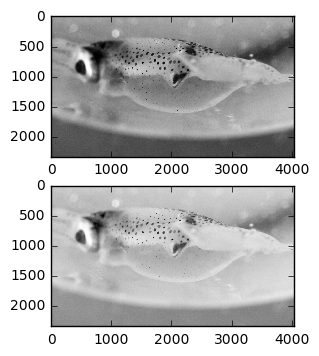

In [14]:
plt.figure(1)
plt.subplot(211)

plt.imshow(pgarr,cmap='gray')
plt.subplot(212)

plt.imshow(pgarr**.5,cmap='gray')
plt.show()

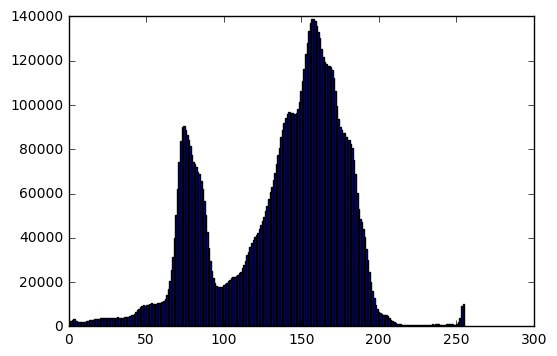

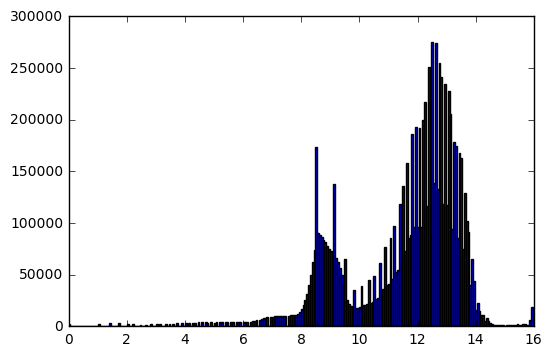

In [15]:
plt.figure()
plt.hist(pgarr.flatten(),bins=256);
plt.figure()
plt.hist((pgarr**.5).flatten(),bins=256);

In [30]:
filt = np.ones([20,20])
print(filt)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

In [31]:
filtnorm = filt/np.sum(filt)
print(filtnorm)

[[ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025]
 [ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025]
 [ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025]
 [ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025]
 [ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025]
 [ 0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025  0.0025
   0.0025  0.0025

In [32]:
from scipy.signal import convolve2d
psmooth = convolve2d(pgarr,filtnorm)

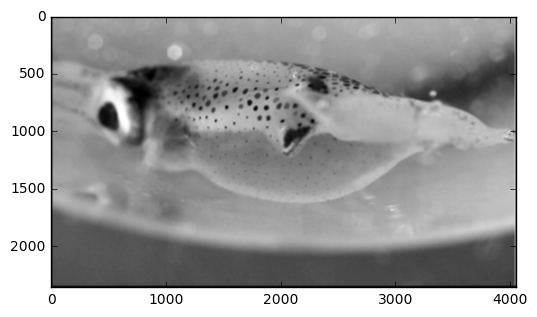

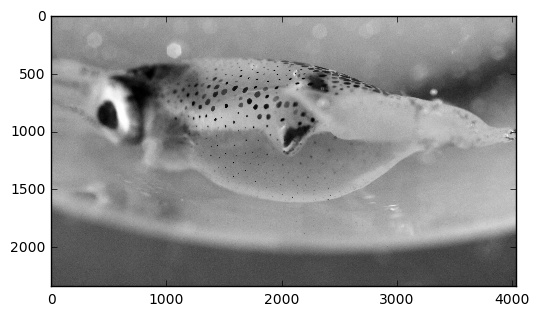

In [33]:
plt.figure()
plt.imshow(psmooth,cmap='gray')
plt.figure()
plt.imshow(pgarr,cmap='gray')

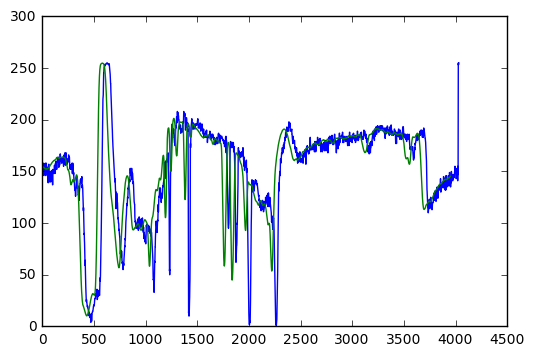

In [34]:
plt.figure()
plt.plot(pgarr[900,:]) 
plt.plot(psmooth[900,50:-50]) 

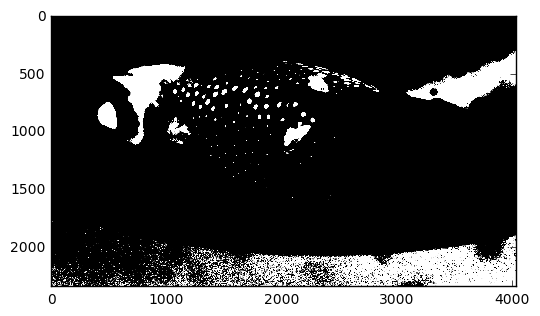

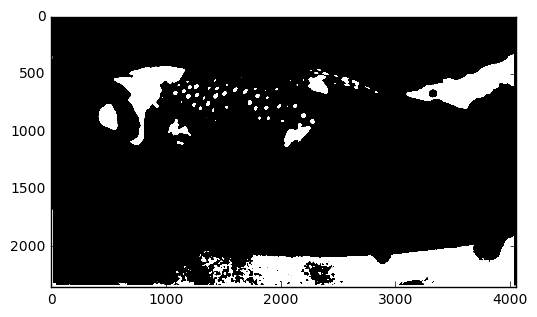

In [35]:
# Making monochromatic image from a threshold value
pthresh = pgarr/255 <0.3
plt.figure()
plt.imshow(pthresh,cmap='gray')
pthreshs = psmooth/255 <0.3
plt.figure()
plt.imshow(pthreshs,cmap='gray')

#### Edge Detection 
Measure how sharp the gradients are (differences in adjacent values)
Spacial derivative

x derivative (horizontal component) = $\frac{df}{dx} = \frac{f(x + \Delta x)-f(x - \Delta x)}{2 \Delta x}$ <br>
y derivative (vertical component) = $\frac{df}{dy} = \frac{f(y + \Delta y)-f(y - \Delta y)}{2 \Delta y}$ <br>

Gradient vector $\nabla f = (\frac{df}{dx}, \frac{df}{dy}) $ 
Magnitude and direction

$\left|\nabla f \right| = \sqrt{(\frac{df}{dx})^2 + (\frac{df}{dy})^2}$


__dfdx__

| -1 | 0 | 1 |
|----|---|---|
| -1 | 0 | 1 |
| -1 | 0 | 1 |

__dfdy__

| 1 | 1 | 1 |
|----|---|---|
| 0 | 0 | 0 |
| -1 | -1 | -1 |

In [52]:
ddx = [[-1,0,1],
       [-1,0,1],
       [-1,0,1]]
ddy = [[-1,-1,-1],
       [0,0,0],
       [1,1,1]]

In [62]:
dpdx = convolve2d(pcrop,ddx)
dpdy = convolve2d(pcrop,ddy)
pgrad = np.sqrt(dpdx**2 + dpdy**2)

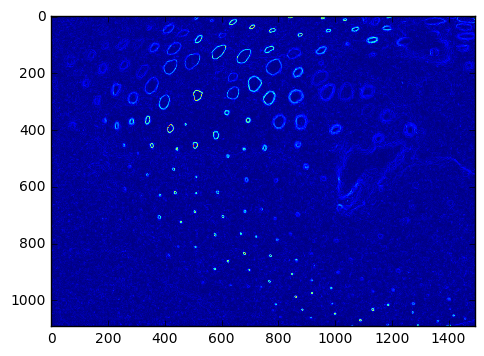

In [63]:
plt.figure()
plt.imshow(pgrad[5:-5,5:-5])

### Relational databases, Tracy Campbell

"Database" : a management system that has been developed to handling and manipulate large amounts of data
<br>
Why not use excel?

<br>

Different Databases:
__Microsoft Access__
__Pros__
- Gui Interface
- Don't need SQL Syntax 


__SQL__
- MySQL
- SQLite
- PostgreSQL



In [36]:
ddx = np.array(([-1,0,1],
                [-1,0,1],
                [-1,0,1]))
ddy = np.array(([1,1,1],
                [0,0,0],
                [-1,-1,-1]))
